# 🧠 Stereo Vision: Patch Matching and Cost Functions (16 Points)

Stereo vision aims to extract depth information from two slightly different views of the same scene—like the ones captured by our eyes. Given a **rectified stereo image pair**, the goal is to compute a **disparity map**, where each pixel tells how much its corresponding point in the other image is shifted.

In this part, you will:

1) Load a stereo image pair (already rectified).

2) Implement common cost functions for matching patches between the left and right images.

3) Visualize the cost values for a single horizontal scanline.

4) Apply patch matching over the full image to compute a simple disparity map.

5) compute the depth and plot a pointcloud using the depth, x, y and color.

## 🖼️ 1. Load Rectified Stereo Images

**Task**: Load 'left.png' adn 'right.png' from the data folder. These are rectified stereo images, and you will use them for the next steps of the exercise.

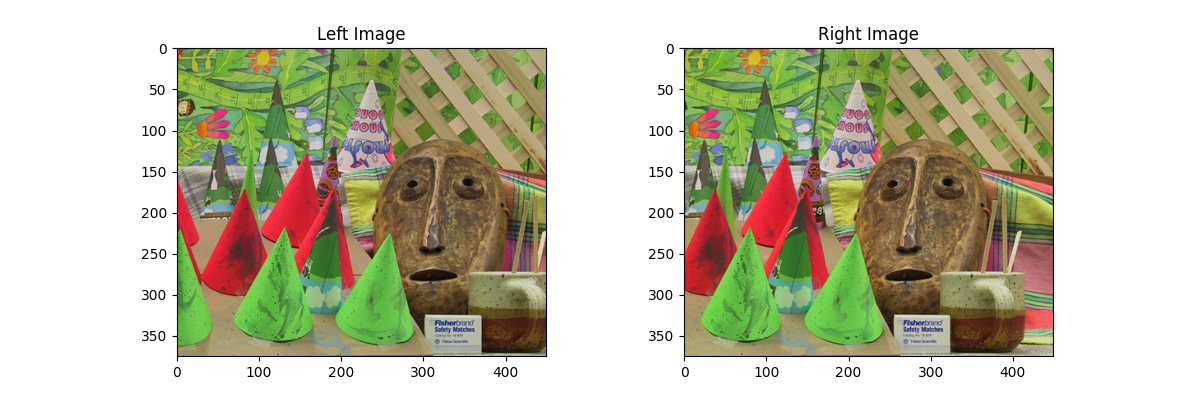

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl
# Load stereo pair
left_img = cv2.imread('../data/left.png', cv2.IMREAD_COLOR_RGB)
right_img = cv2.imread('../data/right.png', cv2.IMREAD_COLOR_RGB)

assert left_img is not None and right_img is not None, "Images not loaded properly!"

# Show images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title('Left Image')
plt.imshow(left_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Right Image')
plt.imshow(right_img, cmap='gray')
plt.show()

# 🧮 2. Cost Functions for Patch Matching (4 Points)

**Task**: Implement three common **cost functions**:

1) Sum of Absolute Differences (***SAD***)

2) Sum of Squared Differences (***SSD***)

3) Normalized Cross-Correlation (***NCC***)

Note: For this block of code, you cannot use for/while loops. Exploit numpy's broadcasting and functions to write fast, vectorized code

In [5]:
def compute_sad(patch1, patch2):
    """Compute Sum of Absolute Differences"""
    return np.sum(np.abs(patch1.astype(np.float32) - patch2.astype(np.float32)))

def compute_ssd(patch1, patch2):
    """Compute Sum of Squared Differences"""
    return np.sum((patch1.astype(np.float32) - patch2.astype(np.float32)) ** 2)

def compute_ncc(patch1, patch2):
    """Compute Normalized Cross-Correlation"""
    p1 = patch1.astype(np.float32).flatten()
    p2 = patch2.astype(np.float32).flatten()
    p1_norm = p1 - np.mean(p1)
    p2_norm = p2 - np.mean(p2)
    numerator = np.sum(p1_norm * p2_norm)
    denominator = np.sqrt(np.sum(p1_norm ** 2) * np.sum(p2_norm ** 2))
    if denominator == 0:
        return 0
    return numerator / denominator

# 📈 3. Plot Cost Function Values for a Single Line (4 Points)

**Task**: Choose a single scanline (e.g., y = 100), select a patch in the left image, and compute cost values for different disparities using each cost function. Plot the cost curves.

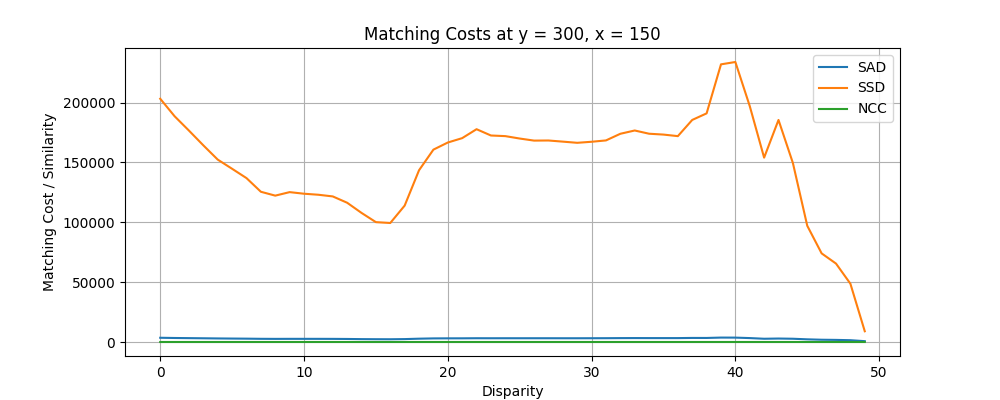

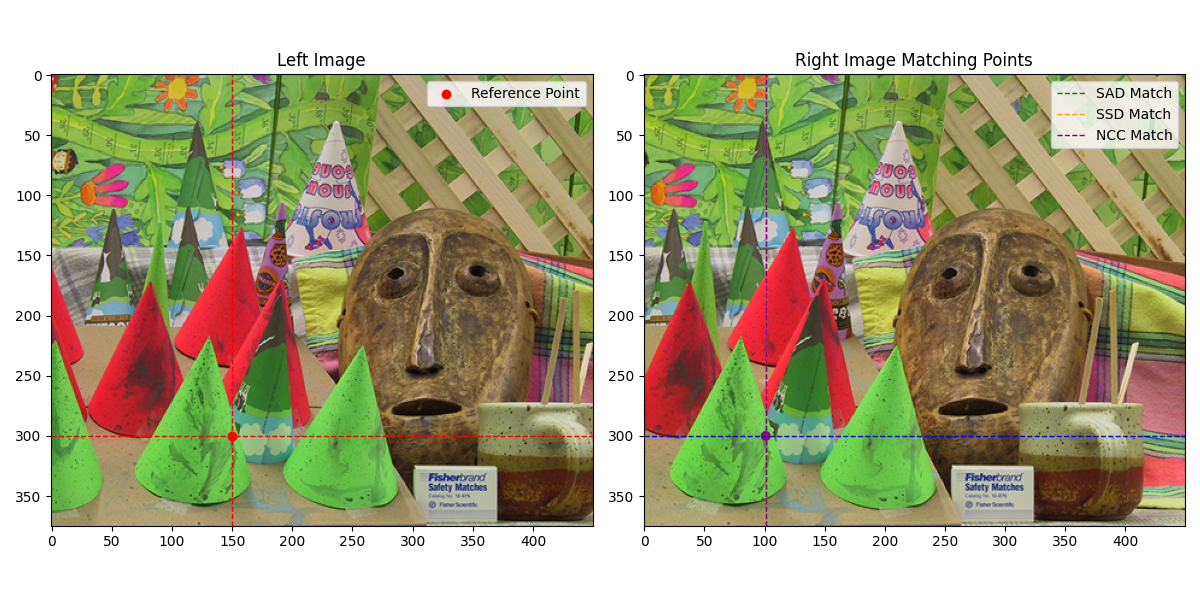

In [6]:
y = 300
x = 150
patch_size = 5
half_size = patch_size // 2
max_disp = 50

# Extract reference patch from left image
patch_left = left_img[y-half_size:y+half_size+1, x-half_size:x+half_size+1]

sads, ssds, nccs = [], [], []

# Loop over disparities
for d in range(max_disp):
    # Calculate x coordinate in right image
    x_right = x - d
    
    # Check bounds to avoid going out of image
    if x_right - half_size < 0:
        # If we're at the edge, append a high cost for SAD/SSD and low similarity for NCC
        sads.append(float('inf'))
        ssds.append(float('inf'))
        nccs.append(-1)  # Lowest possible NCC value
        continue
    
    # Extract patch from right image
    patch_right = right_img[y-half_size:y+half_size+1, x_right-half_size:x_right+half_size+1]
    
    # Compute matching costs
    sads.append(compute_sad(patch_left, patch_right))
    ssds.append(compute_ssd(patch_left, patch_right))
    nccs.append(compute_ncc(patch_left, patch_right))

# Plot cost functions
plt.figure(figsize=(10, 4))
plt.plot(sads, label='SAD')
plt.plot(ssds, label='SSD')
plt.plot(nccs, label='NCC')
plt.xlabel('Disparity')
plt.ylabel('Matching Cost / Similarity')
plt.title(f'Matching Costs at y = {y}, x = {x}')
plt.legend()
plt.grid(True)
plt.show()

# Find the disparity with the lowest cost for each cost function
best_disp_sad = np.argmin(sads)
best_disp_ssd = np.argmin(ssds)
best_disp_ncc = np.argmax(nccs)  # NCC: higher is better, so we use argmax

# Calculate the matching points in the right image
x_right_sad = x - best_disp_sad
x_right_ssd = x - best_disp_ssd
x_right_ncc = x - best_disp_ncc

# Plot the left and right images with matching points
plt.figure(figsize=(12, 6))

# Left image
plt.subplot(1, 2, 1)
plt.title('Left Image')
plt.imshow(left_img)
plt.axhline(y, color='red', linestyle='--', linewidth=1)
plt.axvline(x, color='red', linestyle='--', linewidth=1)
plt.scatter([x], [y], color='red', label='Reference Point')
plt.legend()

# Right image
plt.subplot(1, 2, 2)
plt.title('Right Image Matching Points')
plt.imshow(right_img)
plt.axhline(y, color='blue', linestyle='--', linewidth=1)
plt.axvline(x_right_sad, color='green', linestyle='--', linewidth=1, label='SAD Match')
plt.axvline(x_right_ssd, color='orange', linestyle='--', linewidth=1, label='SSD Match')
plt.axvline(x_right_ncc, color='purple', linestyle='--', linewidth=1, label='NCC Match')
plt.scatter([x_right_sad, x_right_ssd, x_right_ncc], [y, y, y], color=['green', 'orange', 'purple'])
plt.legend()

plt.tight_layout()
plt.show()

**Expected Result**:
![Metrics Plot](../data/metrics_plot.png)
![Point on Image Plot](../data/point_on_images.png)

# 🗺️ 4. Disparity Map Computation (6 Points)

**Task**: Using the cost functions, compute the disparity map for the entire image. Use a fixed disparity range and ignore pixels at the border.

Computing disparity map... This may take a while.
Processing row 50/375
Processing row 100/375
Processing row 150/375
Processing row 200/375
Processing row 250/375
Processing row 300/375
Processing row 350/375
Disparity map computation completed!
Computing disparity map... This may take a while.
Processing row 50/375
Processing row 100/375
Processing row 150/375
Processing row 200/375
Processing row 250/375
Processing row 300/375
Processing row 350/375
Disparity map computation completed!
Computing disparity map... This may take a while.
Processing row 50/375
Processing row 100/375
Processing row 150/375
Processing row 200/375
Processing row 250/375
Processing row 300/375
Processing row 350/375
Disparity map computation completed!


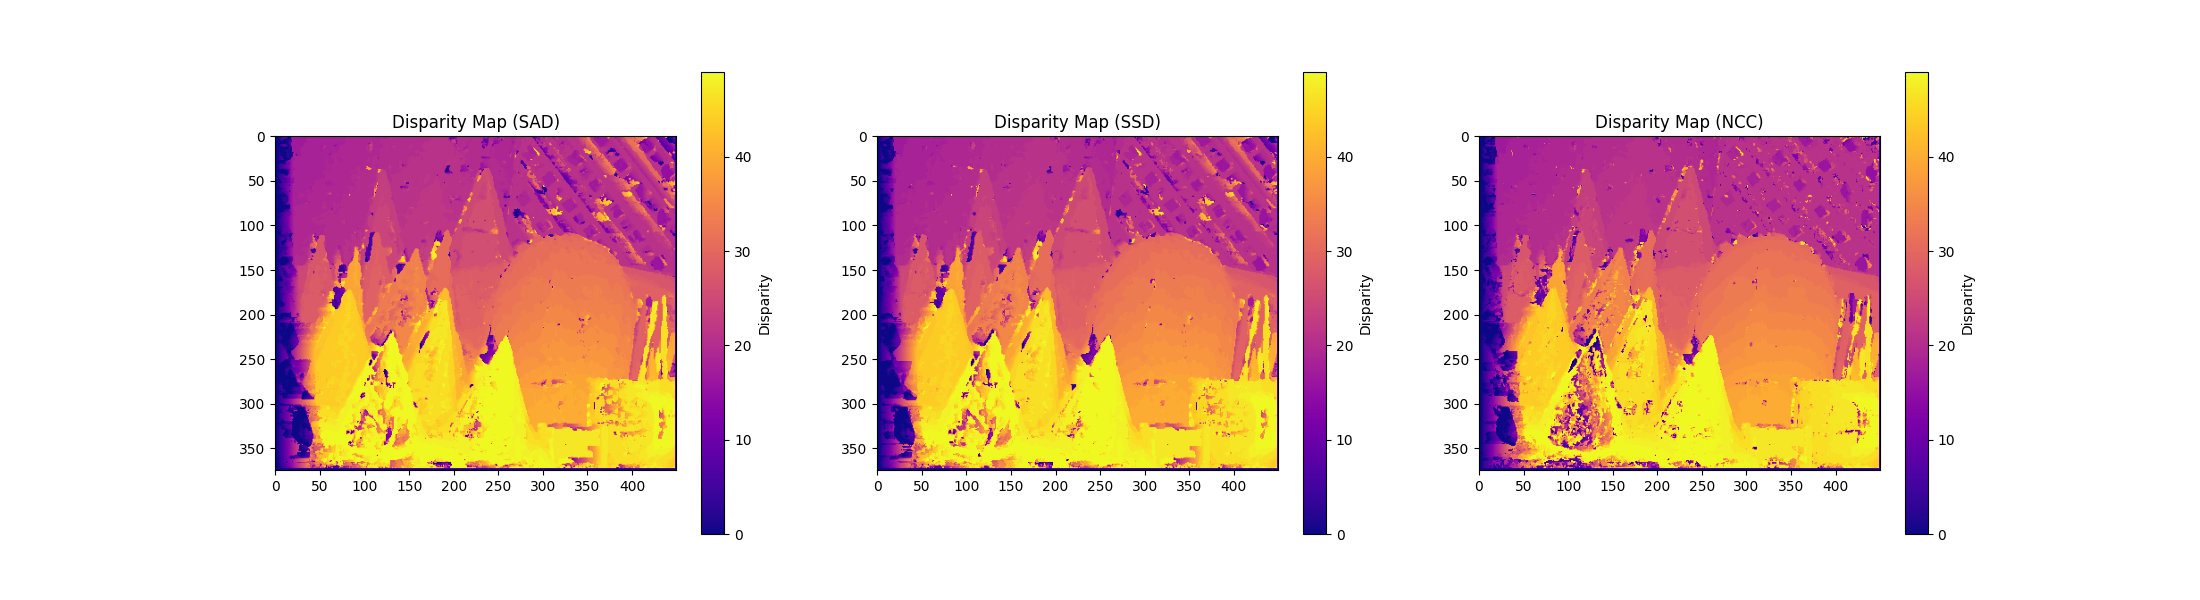

In [7]:
def compute_disparity_map(left_img, right_img, patch_size, max_disp, cost_fn=compute_sad):
    h, w, c = left_img.shape
    half_size = patch_size // 2
    disparity_map = np.zeros((h, w), dtype=np.float32)

    # Loop over each pixel in the left image
    # and compute the disparity map w.r.t. the right image
    
    for y in range(half_size, h - half_size):
        if y % 50 == 0:
            print(f"Processing row {y}/{h}")
            
        for x in range(half_size, w - half_size):
            # Extract reference patch from left image
            patch_left = left_img[y-half_size:y+half_size+1, x-half_size:x+half_size+1]
            
            costs = []
            
            # Loop over disparities
            for d in range(max_disp):
                # Calculate x coordinate in right image
                x_right = x - d
                
                # Check if the patch in right image would be within bounds
                if x_right - half_size < 0 or x_right + half_size >= w:
                    # If out of bounds, assign a high cost for SAD/SSD or low similarity for NCC
                    if cost_fn == compute_ncc:
                        costs.append(-1)  # Lowest possible NCC value
                    else:
                        costs.append(float('inf'))  # High cost for SAD/SSD
                    continue
                
                # Extract patch from right image
                patch_right = right_img[y-half_size:y+half_size+1, x_right-half_size:x_right+half_size+1]
                
                # Compute matching cost
                cost = cost_fn(patch_left, patch_right)
                costs.append(cost)
            
            # Find the disparity with the best cost
            if cost_fn == compute_ncc:
                best_disparity = np.argmax(costs)
            else:
                best_disparity = np.argmin(costs)
            
            # Store the best disparity
            disparity_map[y, x] = best_disparity
    return disparity_map

# Compute and visualize disparity map (this may take a while)
disparity_sad = compute_disparity_map(left_img, right_img, patch_size=patch_size, max_disp=max_disp, cost_fn=compute_sad)
disparity_ssd = compute_disparity_map(left_img, right_img, patch_size=patch_size, max_disp=max_disp, cost_fn=compute_ssd)
disparity_ncc = compute_disparity_map(left_img, right_img, patch_size=patch_size, max_disp=max_disp, cost_fn=compute_ncc)

plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1)
plt.title('Disparity Map (SAD)')
plt.imshow(disparity_sad, cmap='plasma')
plt.colorbar(label='Disparity')
plt.subplot(1, 3, 2)
plt.title('Disparity Map (SSD)')
plt.imshow(disparity_ssd, cmap='plasma')
plt.colorbar(label='Disparity')
plt.subplot(1, 3, 3)
plt.title('Disparity Map (NCC)')
plt.imshow(disparity_ncc, cmap='plasma')
plt.colorbar(label='Disparity')
plt.show()

#### **Expected Result**:<br>
![sad result](../data/sad_result.png)
![ssd result](../data/ssd_result.png)
![ncc result](../data/ncc_result.png)


## 🎯 5. Depth from Disparity and 3D Reconstruction (2 Points)

Once we have a disparity map, we can recover the depth of each pixel using the **pinhole camera model**:

\[
\text{depth} = \frac{f \cdot B}{\text{disparity}}
\]

Where:
- \( f \): focal length of the camera (in pixels)
- \( B \): baseline (distance between cameras, in meters)
- Disparity: pixel shift between corresponding points in left and right images

**Task:**
1) Given `f` and `B`, compute the depth map and visualize it (use SSD disparity map).
2) Convert the depth map into 3D coordinates (X, Y, Z) assuming the optical center is at the image center, and display the point cloud using `matplotlib`.

> 💡 **Try this:**
> - Change the patch size and observe the effect on disparity/depth.
> - What happens in textureless regions?
> - Try using different cost functions and compare the resulting depth maps.

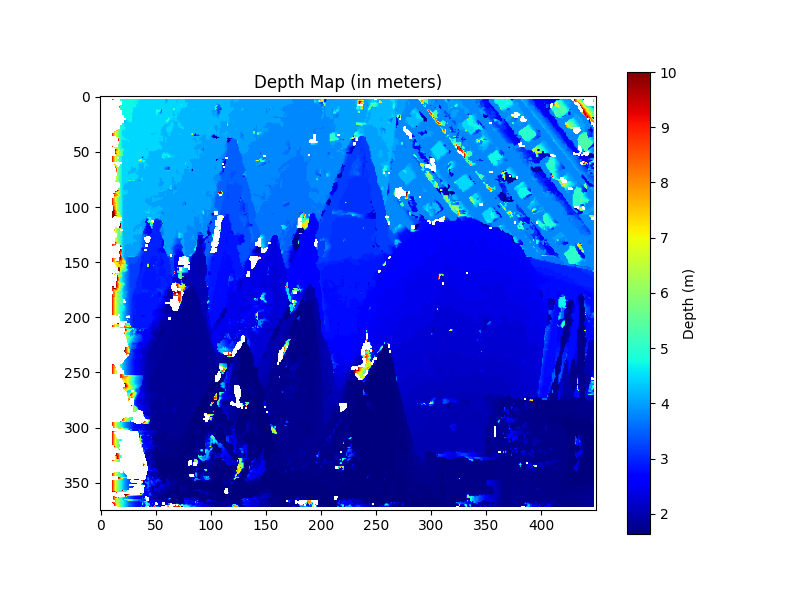

/tmp/ipykernel_57971/1116639407.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Z, Y, c=colors_flat, cmap='jet', s=0.5)


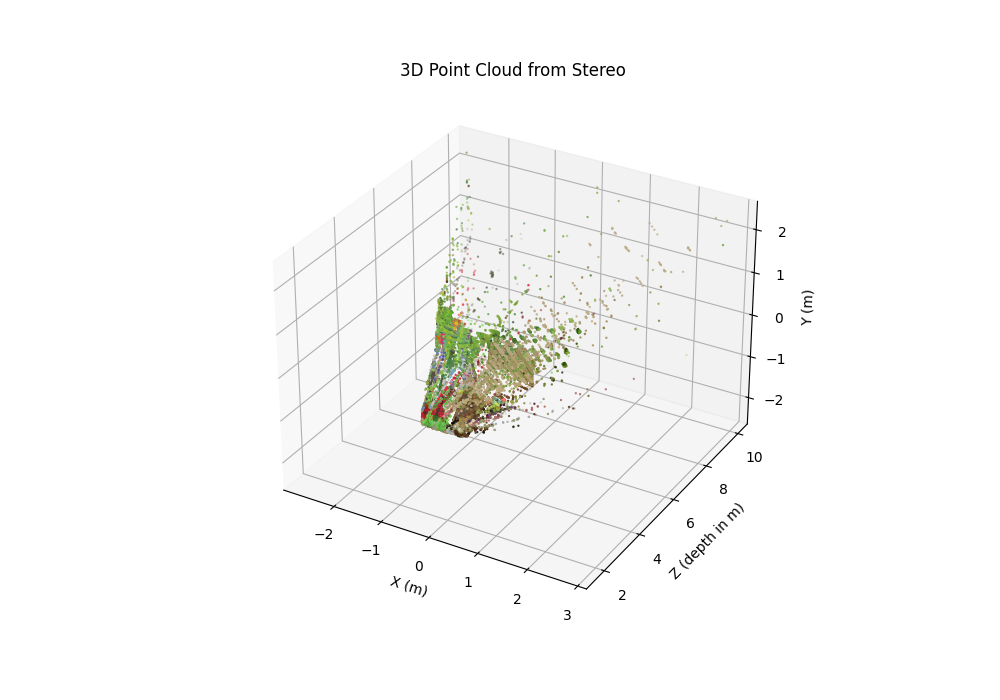

In [8]:

f = 800.0  # focal length in pixels
B = 0.1    # baseline in meters

# Avoid division by zero
disparity_safe = np.where(disparity_ssd > 0, disparity_ssd, np.nan)

# Compute depth map using the formula: depth = (f * B) / disparity
depth = (f * B) / disparity_safe

z_min, z_max = 0., 10.0  # Define a reasonable range for depth in meters

# Remove outliers based on Z values (depth). Set values outside the range [z_min, z_max] to 0
depth = np.where((depth >= z_min) & (depth <= z_max), depth, np.nan)

plt.figure(figsize=(8, 6))
plt.title('Depth Map (in meters)')
plt.imshow(depth, cmap='jet')
plt.colorbar(label='Depth (m)')
plt.show()


h, w = depth.shape
cx, cy = w // 2, h // 2

# Create meshgrid of image coordinates
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
x_coords = x_coords - cx
y_coords = y_coords - cy

# Backproject to 3D
X = x_coords * depth / f
Y = y_coords * depth / f
Z = depth

# Flatten and remove invalid points
mask = ~np.isnan(Z)
X, Y, Z = X[mask], Y[mask], Z[mask]


# Normalize the depth map to match the image dimensions
colors = left_img / 255.0  # Normalize the left image colors to [0, 1]
colors_flat = colors.reshape(-1, 3)
colors_flat = colors_flat[mask.flatten()]

# Downsample colors for faster plotting
step = 5
colors_flat = colors_flat[::step]

# Downsample for faster plotting
X, Y, Z = X[::step], -Y[::step], Z[::step]

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Z, Y, c=colors_flat, cmap='jet', s=0.5)
ax.set_title('3D Point Cloud from Stereo')
ax.set_xlabel('X (m)')
ax.set_ylabel('Z (depth in m)')
ax.set_zlabel('Y (m)')
plt.show()

#### **Expected Result**:<br>
![Depth Image](../data/depth_img.png)
![3D depth plot](../data/depth_plot.gif)

## Bonus Points: More Metrics (2)

To get bonus points for this exercise, try to test more with the similarity/cost functions in order to have good results even with SSD and NCC, or write your own similarity metrc.

Write here what you did for the bonus points:
...